# Stairway To Heaven Only Using Numpy and IPython
### Author: Agosh Saini
#### Contact: agosh.saini@gmail.com

I created this file to better understand the Karplus-Strong (KS) Algorithm. I create the first bar of the iconic Led Zeppelin song Stairway to Heaven. I am very facinated by Brain Machine Interfaces (BMI), both from a materials point of view and from a device point of view. This is my attempt to become proficient in signal processing aspect of BMI so I can better understand the technology and improve upon what is out there currently. I have a lot more to learn and this is just the first step. I have to give credit to the "Digital Signal Processing 1: Basic Concepts and Algorithms" course offered by École Polytechnique Fédérale de Lausanne on Coursera. I modified their code to make this file.

---

#### Imports:

Main imports are Numpy and IPython for creating the audio signals. Matplotlib will be used to visualize the audio files at the end

In [183]:
import numpy as np
import IPython
import matplotlib.pyplot as plt

#### Global Variables

Fs is frequency is Hz. Treble and Bass are the arrays that will store the audio singals. Bar notes takes in all notes, where each value is either rest or how far half tones is the note from referrence note A4

In [226]:
Fs = 16000 

Treble = np.array([])
Bass = np.array([])

bar_notes_treble = np.array(['r', -9, -5, -2, 0, -9, -5, 0])
one_over_note_len_treble = 8 * np.ones(8)

bar_notes_bass = np.array([-12, -13])
one_over_note_len_bass = 2 * np.ones(8)

#### Functions

freq(): converts the half tones from array into the frequency which is associated with the note 

KS(): The function that create the string sound signal from an array of random values

create_sound(): Outputs the audio signal based on the note array and the note length array

In [227]:
def freq(n_half_tones):
    
    freq = 440 * (2 ** (float(n_half_tones) / 12.0))
    
    return freq

In [228]:
def KS (n_half_tones, one_over_note_len, N, alpha):
    
    N_new = int(round(N / one_over_note_len))
       
    x = np.random.randn(int(np.round(float(Fs) / freq(n_half_tones))))

    ref_len = 50
    
    M = len(x)
    
    constant = alpha ** (float(M) / ref_len)
    
    y = np.zeros(N_new)

    for n in range(0, N_new): 
        y[n] = (x[n] if n < M else 0) + (constant * y[n-M] if n-M >= 0 else 0)
    
    return y    

In [229]:
def create_sound(bar_notes, one_over_note_len):
    
    audio = np.array([])
    
    for i in range( len(bar_notes)):
        
        if bar_notes[i] == 'r':
            audio = np.append( audio, 0 * KS(0, one_over_note_len[i], 4 * Fs, 0.99) )
        else:
            audio = np.append( audio, KS( bar_notes[i], one_over_note_len[i], 4 * Fs, 0.99) )
    
    return audio
            

#### Excecute

Excecute each line to listen to Treble, Bass, and complete bar

In [236]:
Treble = create_sound(bar_notes_treble, one_over_note_len_treble)
IPython.display.Audio(Treble, rate=Fs)

In [237]:
Bass = create_sound(bar_notes_bass, one_over_note_len_bass)
IPython.display.Audio(Bass, rate=Fs)

In [238]:
first_bar = Treble + Bass
IPython.display.Audio(first_bar, rate=Fs)

---

#### Visualizing The Audio

Using Matplotlib, we can visualize how the singals looks

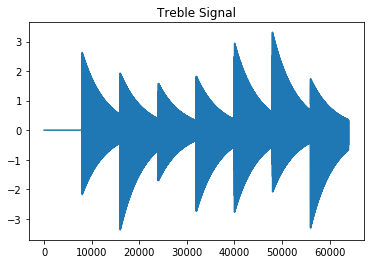

In [239]:
plt.figure(1)
plt.title("Treble Signal")
plt.plot(Treble)
plt.show()

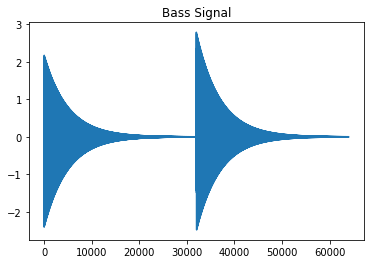

In [240]:
plt.figure(2)
plt.title("Bass Signal")
plt.plot(Bass)
plt.show()

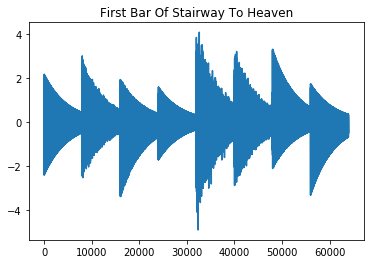

In [242]:
plt.figure(3)
plt.title("First Bar Of Stairway To Heaven")
plt.plot(first_bar)
plt.show()

As we can see, when two singals are just added, there is an increase in noise that can be heard and also seen on the graph to some extent. That would be one of the things I would need to work on in the future